In [ ]:
!pip install pandas matplotlib tensorflow

In [ ]:
import pandas as pd
df = pd.read_excel("/content/SOCIAL_LISTENING_EXCEL_SQL_SEP`20_MAY`21.xlsx")

In [ ]:
df

,Brand,Year,Month,Date,URL,Domain,Platform,Sentiment,Content,Category_1,Category_2,Catgeory_3,Category_4,Category_5,User_Name,Author_Name,Author_Type,Followers,Profile_Details,Profile_Link,Location,MentionID,Language,File_1
0,Alturas,2020,Oct'20,44133,http://www.facebook.com/permalink.php?story_fb...,NaN,Facebook,Neutral,Mailage ketna ha,Query,Product,Product,Product,Mileage,PUSPINDER MEENA TARDA,NaN,General,NaN,NaN,NaN,Unknown,347823505778764_775527549675022_780636042497506,LANGUAGE UNDEFINED,Social Studio
1,Alturas,2020,Oct'20,44133,http://www.facebook.com/permalink.php?story_fb...,NaN,Facebook,Positive,Today excellent service provided by RM Avinash...,Appreciation,Service,Service,Service,Overall Service Experience,BINESHRAUT BINESHRAUT,NaN,General,NaN,NaN,NaN,Unknown,347823505778764_780563985838045,English,Social Studio
2,Alturas,2020,Oct'20,44132,http://www.facebook.com/permalink.php?story_fb...,NaN,Facebook,Positive,Mai alturas ki service shivnath motor mowa se ...,Appreciation,Service,Service,Service,Overall Service Experience,RAGHAW NISHAD,NaN,General,NaN,NaN,NaN,Unknown,347823505778764_779743445920099,Urdu,Social Studio
3,Alturas,2020,Oct'20,44131,http://www.facebook.com/permalink.php?story_fb...,NaN,Facebook,Positive,Came to Sireesh auto Jakkur for a minor repair...,Appreciation,Service,Service,Service,Timeliness of Service,RAJU GOWDA RAJU GOWDA,NaN,General,NaN,NaN,NaN,Unknown,347823505778764_778951805999263,English,Social Studio
4,Alturas,2020,Oct'20,44130,https://www.facebook.com/messages?action=read&...,NaN,Facebook,Neutral,9009411111,General Comment,Details Shared,Details Shared,Details Shared,Details Shared,JASPREET SINGH,NaN,Prospect,NaN,NaN,NaN,Unknown,m_Bv9s0k5ONOuOdU7kPg3C2u2M1JQD3FhgZwlAdia8_3Ah...,English,Social Studio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161826,XUV700,2021,May'21,44319,https://www.instagram.com/p/COZyuyKgToX/,NaN,Instagram,Neutral,"Guess what a viewer sent in ? Yes, the Mahin...",Name Reveal,NaN,NaN,NaN,NaN,NaN,NaN,General,NaN,NaN,NaN,Unknown,18100000000000000,English,Social Studio
161827,XUV700,2021,May'21,44318,https://www.instagram.com/p/COX1cVQH4t6/,NaN,Instagram,Neutral,These leaks were reported by our ATP family me...,Name Reveal,NaN,NaN,NaN,NaN,NaN,NaN,General,NaN,NaN,NaN,Unknown,18100000000000000,English,Social Studio
161828,XUV700,2021,May'21,44317,https://www.instagram.com/p/COVT3-5ASt2/,NaN,Instagram,Neutral,A very Happy Birthday to Anand Mahindra Sir ðŸ...,Name Reveal,NaN,NaN,NaN,NaN,NaN,NaN,General,NaN,NaN,NaN,Unknown,18200000000000000,English,Social Studio
161829,XUV700,2021,May'21,44317,https://www.instagram.com/p/COH2jFLAjUg/#18110...,NaN,Instagram,Neutral,Launch in which month,Query,NaN,NaN,NaN,NaN,NaN,NaN,General,NaN,NaN,NaN,Unknown,18100000000000000,English,Social Studio


In [ ]:
review_df = df[['Content','Sentiment']]
print(review_df.shape)
review_df.head(5)

(161831, 2)


,Content,Sentiment
0,Mailage ketna ha,Neutral
1,Today excellent service provided by RM Avinash...,Positive
2,Mai alturas ki service shivnath motor mowa se ...,Positive
3,Came to Sireesh auto Jakkur for a minor repair...,Positive
4,9009411111,Neutral


In [ ]:
df.columns

Index(['Brand', 'Year', 'Month', 'Date', 'URL', 'Domain', 'Platform',
       'Sentiment', 'Content', 'Category_1', 'Category_2', 'Catgeory_3',
       'Category_4', 'Category_5', 'User_Name', 'Author_Name', 'Author_Type',
       'Followers', 'Profile_Details', 'Profile_Link', 'Location', 'MentionID',
       'Language', 'File_1'],
      dtype='object')

In [ ]:
review_df = review_df[review_df['Sentiment'] != 'Neutral']
print(review_df.shape)
review_df.head(5)

(93952, 2)


,Content,Sentiment
1,Today excellent service provided by RM Avinash...,Positive
2,Mai alturas ki service shivnath motor mowa se ...,Positive
3,Came to Sireesh auto Jakkur for a minor repair...,Positive
11,Awesome product,Positive
15,Superb car ha,Positive


In [ ]:
review_df["Sentiment"].value_counts()

Positive    71957
Negative    21995
Name: Sentiment, dtype: int64

In [ ]:
sentiment_label = review_df.Sentiment.factorize()
sentiment_label

(array([0, 0, 0, ..., 0, 0, 0]),
 Index(['Positive', 'Negative'], dtype='object'))

In [ ]:
review = review_df.Content.values

In [ ]:
review

array(['Today excellent service provided by RM Avinash Kumar in mahindra Service center Kiran Automobile Kumhrar. Thanks BR06PE3052',
       "Mai alturas ki service shivnath motor mowa se karwaya yanha ki service bhut lgi mai apne mahindra user's ko yanha ane k liye bolunga....",
       'Came to Sireesh auto Jakkur for a minor repair and Mr.Khanoj helped me in resolving my vehicles issue and delivered it on time. Thank you very much',
       ...,
       "'@MahindraXUV700 There should be a limit to the tease. Reveal the design before people get annoyed.'",
       'That thumping. That rush Just what you will feel when you get your hands on the #MahindraXUV700. But until you do, tell us what gives you a rush in the comments below! #HelloXUV700 https://t.co/P9DrrkjOi4 https://t.co/txuvLEAyCH',
       "'@MahindraXUV700 Good expose on the years of hard work that went behind the scenes by these creative artists. It shows the stuff it is made of. Irresistible and sturdy in appeal.'"],
      dt

In [ ]:
review = [str(item) for item in review]

In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [ ]:
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(review)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(review)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [ ]:
print(tokenizer.word_index)

{'service': 1, 'i': 2, 'and': 3, 'mahindra': 4, 'my': 5, 'the': 6, 'to': 7, 'for': 8, 'good': 9, 'vehicle': 10, 'is': 11, 'very': 12, 'with': 13, 'of': 14, 'in': 15, 'thanks': 16, 'motors': 17, 'all': 18, 'team': 19, 'am': 20, 'a': 21, 'today': 22, 'you': 23, "'": 24, 'mr': 25, 'happy': 26, 'was': 27, 'thar': 28, 'thank': 29, 'at': 30, 'by': 31, 'from': 32, 'done': 33, 'work': 34, 'me': 35, 'on': 36, 'anandmahindra': 37, 'have': 38, 'car': 39, 'satisfied': 40, 'visited': 41, 'it': 42, 'are': 43, 'this': 44, 'bolero': 45, 'no': 46, 'they': 47, 'so': 48, 'excellent': 49, 'experience': 50, 'staff': 51, 'time': 52, 'hi': 53, 'advisor': 54, 'not': 55, 'scorpio': 56, 'auto': 57, 'aditya': 58, 'your': 59, 'but': 60, 'automobiles': 61, 'that': 62, 'delivery': 63, 'co': 64, 'response': 65, 'https': 66, 't': 67, 'sir': 68, 'automobile': 69, 'got': 70, 'withyouhamesha': 71, 'fully': 72, 'here': 73, 'he': 74, 'also': 75, 'delighted': 76, 'visit': 77, 'as': 78, 'xuv': 79, 'nice': 80, 'm': 81, 'will

In [ ]:
print(review[0])
print(encoded_docs[0])

Today excellent service provided by RM Avinash Kumar in mahindra Service center Kiran Automobile Kumhrar. Thanks BR06PE3052
[22, 49, 1, 134, 31, 332, 1880, 143, 15, 4, 1, 124, 428, 69, 1178, 16]


In [ ]:
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0   22   49    1  134   31  332 1880  143   15    4    1  124
  428 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           2933376   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,950,027
Trainable params: 2,950,027
Non-trainable params: 0
______________________________________________

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
2349/2349 [==============================] - 646s 273ms/step - loss: 0.1388 - accuracy: 0.9451 - val_loss: 0.1333 - val_accuracy: 0.9492
Epoch 2/5
2349/2349 [==============================] - 640s 272ms/step - loss: 0.0913 - accuracy: 0.9666 - val_loss: 0.1386 - val_accuracy: 0.9529
Epoch 3/5
2349/2349 [==============================] - 648s 276ms/step - loss: 0.0816 - accuracy: 0.9701 - val_loss: 0.1254 - val_accuracy: 0.9526
Epoch 4/5
2349/2349 [==============================] - 646s 275ms/step - loss: 0.0752 - accuracy: 0.9720 - val_loss: 0.1293 - val_accuracy: 0.9536
Epoch 5/5
2349/2349 [==============================] - 646s 275ms/step - loss: 0.0709 - accuracy: 0.9742 - val_loss: 0.1491 - val_accuracy: 0.9525


In [ ]:
history.history['accuracy'][-1]

0.9741621613502502

In [ ]:
#Validation set accuracy (80% Train set-20% validation set)
history.history['val_accuracy'][-1]

0.9525304436683655

In [ ]:
#training loss
history.history['loss'][-1]

0.0709424838423729

In [ ]:
#Validation loss
history.history['val_loss'][-1]

0.1491183489561081

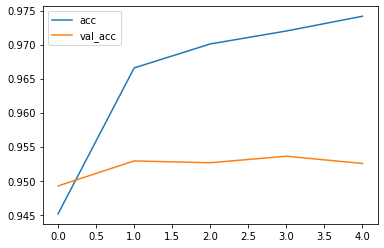

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

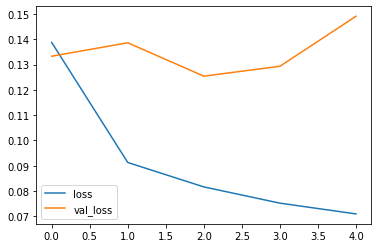

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [ ]:
model.save("/content/LSTM_Mahindra")

INFO:tensorflow:Assets written to: /content/LSTM_Mahindra/assets


In [ ]:
!zip -r /content/file_1.zip /content/LSTM_Mahindra

  adding: content/LSTM_Mahindra/ (stored 0%)
  adding: content/LSTM_Mahindra/saved_model.pb (deflated 89%)
  adding: content/LSTM_Mahindra/assets/ (stored 0%)
  adding: content/LSTM_Mahindra/keras_metadata.pb (deflated 87%)
  adding: content/LSTM_Mahindra/variables/ (stored 0%)
  adding: content/LSTM_Mahindra/variables/variables.index (deflated 60%)
  adding: content/LSTM_Mahindra/variables/variables.data-00000-of-00001 (deflated 66%)


In [ ]:
from google.colab import files
files.download("/content/file_1.zip")

In [ ]:
model.save("/content/LSTM_Mahindra_h.h5")

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x7ff085a6a850>>

In [ ]:
model.save("/content/LSTM_mahindra.model")

INFO:tensorflow:Assets written to: /content/LSTM_mahindra.model/assets


INFO:tensorflow:Assets written to: /content/LSTM_mahindra.model/assets


In [ ]:
!zip -r /content/file.zip /content/LSTM_mahindra.model

  adding: content/LSTM_mahindra.model/ (stored 0%)
  adding: content/LSTM_mahindra.model/saved_model.pb (deflated 90%)
  adding: content/LSTM_mahindra.model/assets/ (stored 0%)
  adding: content/LSTM_mahindra.model/keras_metadata.pb (deflated 87%)
  adding: content/LSTM_mahindra.model/variables/ (stored 0%)
  adding: content/LSTM_mahindra.model/variables/variables.index (deflated 60%)
  adding: content/LSTM_mahindra.model/variables/variables.data-00000-of-00001 (deflated 66%)


In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    return sentiment_label[1][prediction]


test_sentence1 = "Today excellent service provided by RM Avinash Kumar in mahindra Service center Kiran Automobile Kumhrar. Thanks BR06PE3052"
print(predict_sentiment(test_sentence1))

test_sentence2 = "I have buyed top model of marazzo I sent it today for 1st service iam totally unsatisfied by the worst work done on my car plz resolve my problem Mahindra Marazzo  Mahindra Experience Anand Mahindra fanpage  Mahindra Group"
print(predict_sentiment(test_sentence2))

Positive
Negative


In [ ]:
def predict_sentiment_epoch_30(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(new_model.predict(tw).round().item())
    return sentiment_label[1][prediction]


#test_sentence1 = "Fraud company h iska sab dealer fraud h."
#print(predict_sentiment_epoch_30(test_sentence1))

#test_sentence2 = "I have buyed top model of marazzo I sent it today for 1st service iam totally unsatisfied by the worst work done on my car plz resolve my problem Mahindra Marazzo  Mahindra Experience Anand Mahindra fanpage  Mahindra Group"
#print(predict_sentiment(test_sentence2))

Negative


In [ ]:
def predict_sentiment_epoch_50(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model_epoch_50.predict(tw).round().item())
    return sentiment_label[1][prediction]


#test_sentence1 = "Fraud company h iska sab dealer fraud h."
#print(predict_sentiment_epoch_50(test_sentence1))

#test_sentence2 = "I have buyed top model of marazzo I sent it today for 1st service iam totally unsatisfied by the worst work done on my car plz resolve my problem Mahindra Marazzo  Mahindra Experience Anand Mahindra fanpage  Mahindra Group"
#print(predict_sentiment(test_sentence2))

In [ ]:
from sklearn.model_selection import train_test_split
x = review_df['Content']
y = review_df['Sentiment']
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size = 0.3, shuffle=True) 

In [ ]:
x_test = x_test.values

In [ ]:
x_test = [str(item) for item in x_test]

In [ ]:
pred = pd.DataFrame(columns=['test_Content', 'prediction_LSTM'])

In [ ]:
pred

,test_Content,prediction_LSTM


In [ ]:
pred.loc[len(pred.index)] = [x_test[0], predict_sentiment_epoch_50(x_test[0])] 

In [ ]:
pred

,test_Content,prediction_LSTM
0,I visited today brajesh automobile purnea for ...,Positive


In [ ]:
for i in range(len(x_test)):
  pred.loc[len(pred.index)] = [x_test[i], predict_sentiment_epoch_50(x_test[i])] 

In [ ]:
pred = pred.iloc[1: , :]
pred

,test_Content,prediction_LSTM
1,I visited today brajesh automobile purnea for ...,Positive
2,AAJ mai apni bolero pick up ki service ke liye...,Positive
3,Photo post from Guddu Alam,Positive
4,I have booked my thar on dealer ship they u ge...,Negative
5,'@anandmahindra Waiting for your new offering ...,Positive
...,...,...
28182,à¤®à¤¹à¤¿à¤‚à¤¦à¥à¤°à¤¾ à¤¨à¥‡à¤•à¥à¤¸à¤œà¥‡...,Positive
28183,AP39CX0484 XUV5OO Today visited for service ce...,Positive
28184,Hi.. Mahindra today I visited to Aditya motors...,Positive
28185,ðŸ”¥ðŸ”¥ðŸ”¥ðŸ”¥,Positive


In [ ]:
pred.to_csv('Final_Prediction_LSTM_epoch_50_shuffle.csv', index = None)

#Accuracy in Test set

In [ ]:
import pandas as pd
y_p = pd.read_csv('/content/Final_Prediction_LSTM_epoch_50_shuffle.csv')


In [ ]:
y_p

,test_Content,prediction_LSTM
0,I visited today brajesh automobile purnea for ...,Positive
1,AAJ mai apni bolero pick up ki service ke liye...,Positive
2,Photo post from Guddu Alam,Positive
3,I have booked my thar on dealer ship they u ge...,Negative
4,'@anandmahindra Waiting for your new offering ...,Positive
...,...,...
28181,à¤®à¤¹à¤¿à¤‚à¤¦à¥à¤°à¤¾ à¤¨à¥‡à¤•à¥à¤¸à¤œà¥‡...,Positive
28182,AP39CX0484 XUV5OO Today visited for service ce...,Positive
28183,Hi.. Mahindra today I visited to Aditya motors...,Positive
28184,ðŸ”¥ðŸ”¥ðŸ”¥ðŸ”¥,Positive


In [ ]:
y_pred = y_p['prediction_LSTM']

In [ ]:
#epoch 5
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6407854824117929


In [ ]:
#epoch 30
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.982491618327923


In [ ]:
#epoch 50
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9821190995689426


In [ ]:
#epoch 50_shuffle
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9832895763854396


In [ ]:
#epoch 5
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 1022,  3308],
       [ 3442, 11019]])

In [ ]:
#epoch 30
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 4295,   155],
       [  174, 14167]])

In [ ]:
#epoch 50
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 4151,   197],
       [  139, 14304]])

#Increasing Epoch values and then testing it using the same procedure

In [ ]:
import tensorflow as tf
import keras

In [ ]:
!unzip /content/file_1.zip

Archive:  /content/file_1.zip
   creating: content/LSTM_Mahindra/
  inflating: content/LSTM_Mahindra/saved_model.pb  
   creating: content/LSTM_Mahindra/assets/
  inflating: content/LSTM_Mahindra/keras_metadata.pb  
   creating: content/LSTM_Mahindra/variables/
  inflating: content/LSTM_Mahindra/variables/variables.index  
  inflating: content/LSTM_Mahindra/variables/variables.data-00000-of-00001  


In [ ]:
new_model = tf.keras.models.load_model('/content/content/LSTM_Mahindra')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           2933376   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,950,027
Trainable params: 2,950,027
Non-trainable params: 0
______________________________________________

In [ ]:
history = new_model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=30, batch_size=32)

Epoch 1/30
2349/2349 [==============================] - 677s 287ms/step - loss: 0.0692 - accuracy: 0.9745 - val_loss: 0.1475 - val_accuracy: 0.9520
Epoch 2/30
2349/2349 [==============================] - 655s 279ms/step - loss: 0.0663 - accuracy: 0.9755 - val_loss: 0.1370 - val_accuracy: 0.9528
Epoch 3/30
2349/2349 [==============================] - 654s 278ms/step - loss: 0.0631 - accuracy: 0.9771 - val_loss: 0.1607 - val_accuracy: 0.9509
Epoch 4/30
2349/2349 [==============================] - 654s 278ms/step - loss: 0.0610 - accuracy: 0.9784 - val_loss: 0.1527 - val_accuracy: 0.9510
Epoch 5/30
2349/2349 [==============================] - 653s 278ms/step - loss: 0.0579 - accuracy: 0.9791 - val_loss: 0.1509 - val_accuracy: 0.9509
Epoch 6/30
2349/2349 [==============================] - 656s 279ms/step - loss: 0.0565 - accuracy: 0.9800 - val_loss: 0.1721 - val_accuracy: 0.9497
Epoch 7/30
2349/2349 [==============================] - 650s 277ms/step - loss: 0.0543 - accuracy: 0.9804 - val_

In [ ]:
new_model.save('/content/epoch_30')


INFO:tensorflow:Assets written to: /content/epoch_50/assets
INFO:tensorflow:Assets written to: /content/epoch_50/assets


In [ ]:
!zip -r /content/epoch_30.zip /content/epoch_30

  adding: content/epoch_50/ (stored 0%)
  adding: content/epoch_50/assets/ (stored 0%)
  adding: content/epoch_50/saved_model.pb (deflated 89%)
  adding: content/epoch_50/keras_metadata.pb (deflated 87%)
  adding: content/epoch_50/variables/ (stored 0%)
  adding: content/epoch_50/variables/variables.index (deflated 60%)
  adding: content/epoch_50/variables/variables.data-00000-of-00001  adding: content/epoch_50/ (stored 0%)
  adding: content/epoch_50/assets/ (stored 0%)
  adding: content/epoch_50/saved_model.pb (deflated 89%)
  adding: content/epoch_50/keras_metadata.pb (deflated 87%)
  adding: content/epoch_50/variables/ (stored 0%)
  adding: content/epoch_50/variables/variables.index (deflated 60%)
  adding: content/epoch_50/variables/variables.data-00000-of-00001 (deflated 66%)
 (deflated 66%)


In [ ]:
from google.colab import files
files.download("/content/epoch_30.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Epoch 50


In [ ]:
new_model_50 = tf.keras.models.load_model('/content/epoch_30')

In [ ]:
new_model_50.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           2933376   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,950,027
Trainable params: 2,950,027
Non-trainable params: 0
______________________________________________

In [ ]:
history = new_model_50.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=20, batch_size=32)

Epoch 1/20
2349/2349 [==============================] - 766s 323ms/step - loss: 0.0370 - accuracy: 0.9866 - val_loss: 0.2521 - val_accuracy: 0.9467
Epoch 2/20
2349/2349 [==============================] - 698s 297ms/step - loss: 0.0357 - accuracy: 0.9875 - val_loss: 0.2803 - val_accuracy: 0.9451
Epoch 3/20
2349/2349 [==============================] - 694s 295ms/step - loss: 0.0360 - accuracy: 0.9870 - val_loss: 0.2282 - val_accuracy: 0.9465
Epoch 4/20
2349/2349 [==============================] - 697s 297ms/step - loss: 0.0363 - accuracy: 0.9874 - val_loss: 0.2317 - val_accuracy: 0.9469
Epoch 5/20
2349/2349 [==============================] - 695s 296ms/step - loss: 0.0349 - accuracy: 0.9872 - val_loss: 0.2462 - val_accuracy: 0.9468
Epoch 6/20
2349/2349 [==============================] - 699s 298ms/step - loss: 0.0347 - accuracy: 0.9877 - val_loss: 0.2311 - val_accuracy: 0.9469
Epoch 7/20
2349/2349 [==============================] - 701s 299ms/step - loss: 0.0337 - accuracy: 0.9873 - val_

In [ ]:
new_model_50.save('/content/epoch_50')

INFO:tensorflow:Assets written to: /content/epoch_50/assets


INFO:tensorflow:Assets written to: /content/epoch_50/assets


In [ ]:
!zip -r /content/epoch_50.zip /content/epoch_50

  adding: content/epoch_50/ (stored 0%)
  adding: content/epoch_50/assets/ (stored 0%)
  adding: content/epoch_50/saved_model.pb (deflated 89%)
  adding: content/epoch_50/keras_metadata.pb (deflated 87%)
  adding: content/epoch_50/variables/ (stored 0%)
  adding: content/epoch_50/variables/variables.index (deflated 60%)
  adding: content/epoch_50/variables/variables.data-00000-of-00001 (deflated 66%)


In [ ]:
from google.colab import files
files.download('/content/epoch_50.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Testing after training till 50 epochs

In [ ]:
!unzip /content/epoch_50.zip

Archive:  /content/epoch_50.zip
   creating: content/epoch_50/
   creating: content/epoch_50/assets/
  inflating: content/epoch_50/saved_model.pb  
  inflating: content/epoch_50/keras_metadata.pb  
   creating: content/epoch_50/variables/
  inflating: content/epoch_50/variables/variables.index  
  inflating: content/epoch_50/variables/variables.data-00000-of-00001  


In [ ]:
model_epoch_50 = tf.keras.models.load_model('/content/content/epoch_50')

In [ ]:
from google.colab import files
files.download('/content/Final_Prediction_LSTM_epoch_50_shuffle.csv')

#Testing on New data

In [ ]:
new_data = pd.read_excel('/content/Social_Listening_Excel_SQL_JAN17_AUG20.xlsx')

In [ ]:
new_data.head()

,Brand,Year,Month,Date,URL,Domain,Platform,Sentiment,Content,Category_1,Category_2,Catgeory_3,Category_4,Category_5,User_Name,Author_Name,Author_Type,Followers,Profile_Details,Profile_Link,Location,MentionID,Language,File
0,Scorpio,2017,Jan'17,42766.0,https://www.carwale.com/news//news/new-mahindr...,NaN,Mainstream Media,Neutral,"16 hours ago - First introduced in 2007, the M...",Classified,NaN,NaN,NaN,NaN,NaN,NaN,-,0,NaN,NaN,NaN,NaN,NaN,Locobuzz
1,Scorpio,2017,Jan'17,42766.0,https://www.carwale.com/used/cars-in-hyderabad...,NaN,Mainstream Media,Neutral,1 day ago - CarWale - Used Mahindra Scorpio [2...,Classified,NaN,NaN,NaN,NaN,NaN,NaN,-,0,NaN,NaN,NaN,NaN,NaN,Locobuzz
2,Scorpio,2017,Jan'17,42765.0,https://www.carwale.com/used/cars-in-hyderabad...,NaN,Mainstream Media,Neutral,20 hours ago - CarWale - Used Mahindra Scorpio...,Classified,NaN,NaN,NaN,NaN,NaN,NaN,-,0,NaN,NaN,NaN,NaN,NaN,Locobuzz
3,Scorpio,2017,Jan'17,42766.0,http://indianautosblog.com/2017/01/2017-mahind...,NaN,Mainstream Media,Neutral,1 hour ago - The 2017 Mahindra Scorpio Getaway...,Classified,NaN,NaN,NaN,NaN,NaN,NaN,-,0,NaN,NaN,NaN,NaN,NaN,Locobuzz
4,Scorpio,2017,Jan'17,42765.0,https://www.carwale.com/used/cars-in-kolkata/m...,NaN,Mainstream Media,Neutral,19 hours ago - CarWale - Used Mahindra Scorpio...,Classified,NaN,NaN,NaN,NaN,NaN,NaN,-,0,NaN,NaN,NaN,NaN,NaN,Locobuzz


In [ ]:
review_df_new = new_data[['Content','Sentiment']]
print(review_df_new.shape)
review_df_new.head(5)

(499743, 2)


,Content,Sentiment
0,"16 hours ago - First introduced in 2007, the M...",Neutral
1,1 day ago - CarWale - Used Mahindra Scorpio [2...,Neutral
2,20 hours ago - CarWale - Used Mahindra Scorpio...,Neutral
3,1 hour ago - The 2017 Mahindra Scorpio Getaway...,Neutral
4,19 hours ago - CarWale - Used Mahindra Scorpio...,Neutral


In [ ]:
review_df_new = review_df_new[review_df_new['Sentiment'] != 'Neutral']
print(review_df_new.shape)
review_df_new.head(5)

(207108, 2)


,Content,Sentiment
15,14 hours ago - Mahindra Scorpio User Reviews -...,Positive
16,14 hours ago - Mahindra Scorpio User Reviews -...,Positive
17,14 hours ago - Mahindra Scorpio User Reviews -...,Positive
18,13 hours ago - Mahindra Scorpio User Reviews -...,Positive
19,13 hours ago - Mahindra Scorpio User Reviews -...,Positive


In [ ]:
review_df_new['Sentiment'].value_counts()

Positive    159801
Negative     47307
Name: Sentiment, dtype: int64

In [ ]:
review = review_df_new.Content.values

In [ ]:
review

array(['14 hours ago - Mahindra Scorpio User Reviews - Read first-hand reviews of actual Mahindra Scorpio owners. Find out what buyers of Mahindra Scorpio have to say about the#160;...',
       '14 hours ago - Mahindra Scorpio User Reviews - Read first-hand reviews of actual Mahindra Scorpio owners. Find out what buyers of Mahindra Scorpio have to say about the#160;...',
       '14 hours ago - Mahindra Scorpio User Reviews - Read first-hand reviews of actual Mahindra Scorpio owners. Find out what buyers of Mahindra Scorpio have to say about the#160;...',
       ...,
       '@anandmahindra @SantoshAutoWing\nDear team,\n We feel very much safe at the service centre as they taking care of all safety measures. Thank u santosh Auto Wings for making us feel like stay home stay safe.\nVehicle number :- KA29N5766\nMARAZZO 2nd free service.\nAdvisor DANESH.',
       '@anandmahindra\n@SantoshAutoWing\nDear team,\n We feel very much safe at the service centre as they taking care of all safety mea

In [ ]:
review = [str(item) for item in review]

In [ ]:
from sklearn.model_selection import train_test_split
x = review_df_new['Content']
y = review_df_new['Sentiment']
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size = 0.2) 

In [ ]:
x_test = x_test.values

In [ ]:
x_test = [str(item) for item in x_test]

In [ ]:
pred = pd.DataFrame(columns=['test_Content', 'prediction_LSTM'])

In [ ]:
pred.loc[len(pred.index)] = [x_test[0], predict_sentiment_epoch_50(x_test[0])] 

In [ ]:
pred

,test_Content,prediction_LSTM
0,Experience With Kuv 100 Nxt 😊,Positive


In [ ]:
for i in range(len(x_test)):
  pred.loc[len(pred.index)] = [x_test[i], predict_sentiment_epoch_50(x_test[i])] 

In [ ]:
pred = pred.iloc[1: , :]
pred

,test_Content,prediction_LSTM
1,Experience With Kuv 100 Nxt 😊,Positive
2,Mahindra kuv 100 bilkul bakvas gadi hai bhaiyo...,Negative
3,I bought one two years back.\n\nVery poor serv...,Negative
4,I am proud user of mahindra Scorpio from last ...,Positive
5,Lovely suv in India.but maintainc it expensive...,Positive
...,...,...
41418,RT @sidpatankar: Stellar achievement by @Mahin...,Negative
41419,RT @drkellyhenning: Congratulations to @Mahind...,Positive
41420,Nice,Positive
41421,#kullu #manali #xuv500 #friendgoals #expressway,Positive


In [ ]:
pred.to_csv('Final_Prediction_LSTM_epoch_50_new_data.csv', index = None)

In [ ]:
y_pred = pred['prediction_LSTM']

In [ ]:
#new data_50_epoch
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9090338467481048


In [ ]:
#new data_50_epoch
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 8094,  1310],
       [ 2458, 29560]])

#Mixing Data_New+Old


In [ ]:
x = review_df[['Content']]
y = review_df[['Sentiment']]
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_new = review_df_new[['Content']]
y_new = review_df_new[['Sentiment']]
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new,y_new,test_size=0.2)

In [ ]:
complete_data_x = pd.concat([x_test_new,x_test], axis = 0)

In [ ]:
complete_data_x = complete_data_x.values

In [ ]:
complete_data_x = [str(item) for item in complete_data_x]

In [ ]:
complete_data_y = pd.concat([y_test_new, y_test], axis = 0)

In [ ]:
pred_complete = pd.DataFrame(columns=['test_Content', 'prediction_LSTM']) 

In [ ]:
pred_complete.loc[len(pred_complete.index)] = [complete_data_x[0], predict_sentiment_epoch_50(complete_data_x[0])] 

In [ ]:
pred_complete

,test_Content,prediction_LSTM
0,['#carlovers222 #xuv500 car_lovers___222 \n@'],Positive


In [ ]:
for i in range(len(complete_data_x)):
  pred_complete.loc[len(pred_complete.index)] = [complete_data_x[i], predict_sentiment_epoch_50(complete_data_x[i])] 

In [ ]:
pred_complete = pred_complete.iloc[1: , :]
pred_complete

,test_Content,prediction_LSTM
1,['#carlovers222 #xuv500 car_lovers___222 \n@'],Positive
2,['Experience of Marrazo'],Positive
3,['RT @ManudevSinsini: .@anandmahindra \n@Mahin...,Negative
4,['Don’t buy mahindera suvs we purchased 20 tuv...,Negative
5,['@MotorOctane @MahindraMarazzo @anandmahindra...,Negative
...,...,...
60209,['Hii Mahindra. Today visit pioneer mahind...,Positive
60210,['Happy with body shop repairs'],Positive
60211,['Content not available'],Negative
60212,"['Today i visited Auto Centre, Raigarhfor my V...",Positive


In [ ]:
pred_complete.to_csv('Final_Prediction_LSTM_epoch_50_complete_data.csv', index = None)

In [ ]:
y_pred = pred_complete['prediction_LSTM']

In [ ]:
#new+old data_50_epoch
from sklearn.metrics import accuracy_score
print(accuracy_score(complete_data_y, y_pred))

0.9148356667164897


In [ ]:
#new+old data_50_epoch
from sklearn.metrics import confusion_matrix
confusion_matrix(complete_data_y, y_pred)

array([[11714,  2123],
       [ 3005, 43371]])

#Task1_31-01-2022

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Final_Prediction_LSTM_epoch_50_new_data.csv')


In [ ]:
df

,test_Content,prediction_LSTM
0,Experience With Kuv 100 Nxt 😊,Positive
1,Mahindra kuv 100 bilkul bakvas gadi hai bhaiyo...,Negative
2,I bought one two years back.\n\nVery poor serv...,Negative
3,I am proud user of mahindra Scorpio from last ...,Positive
4,Lovely suv in India.but maintainc it expensive...,Positive
...,...,...
41417,RT @sidpatankar: Stellar achievement by @Mahin...,Negative
41418,RT @drkellyhenning: Congratulations to @Mahind...,Positive
41419,Nice,Positive
41420,#kullu #manali #xuv500 #friendgoals #expressway,Positive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df1 = pd.read_excel('/content/gdrive/MyDrive/Mahindra/Social_Listening_Excel_SQL_JAN17_AUG20.xlsx')

In [ ]:
df1 = df1[df1['Sentiment'] != 'Neutral']
print(df1.shape)
df1.head(5)

(207108, 24)


,Brand,Year,Month,Date,URL,Domain,Platform,Sentiment,Content,Category_1,Category_2,Catgeory_3,Category_4,Category_5,User_Name,Author_Name,Author_Type,Followers,Profile_Details,Profile_Link,Location,MentionID,Language,File
15,Scorpio,2017,Jan'17,42762.0,https://www.carwale.com/m/mahindra-cars/scorpi...,NaN,Mainstream Media,Positive,14 hours ago - Mahindra Scorpio User Reviews -...,Performance,Feedback,NaN,NaN,NaN,NaN,NaN,-,0,NaN,NaN,NaN,NaN,NaN,Locobuzz
16,Scorpio,2017,Jan'17,42762.0,https://www.carwale.com/m/mahindra-cars/scorpi...,NaN,Mainstream Media,Positive,14 hours ago - Mahindra Scorpio User Reviews -...,Design,Interiors- Design/style,NaN,NaN,NaN,NaN,NaN,-,0,NaN,NaN,NaN,NaN,NaN,Locobuzz
17,Scorpio,2017,Jan'17,42762.0,https://www.carwale.com/m/mahindra-cars/scorpi...,NaN,Mainstream Media,Positive,14 hours ago - Mahindra Scorpio User Reviews -...,Design,Exterior- Design/style,NaN,NaN,NaN,NaN,NaN,-,0,NaN,NaN,NaN,NaN,NaN,Locobuzz
18,Scorpio,2017,Jan'17,42762.0,https://www.carwale.com/m/mahindra-cars/scorpi...,NaN,Mainstream Media,Positive,13 hours ago - Mahindra Scorpio User Reviews -...,Performance,Feedback,NaN,NaN,NaN,NaN,NaN,-,0,NaN,NaN,NaN,NaN,NaN,Locobuzz
19,Scorpio,2017,Jan'17,42762.0,https://www.carwale.com/m/mahindra-cars/scorpi...,NaN,Mainstream Media,Positive,13 hours ago - Mahindra Scorpio User Reviews -...,Design,Interiors- Design/style,NaN,NaN,NaN,NaN,NaN,-,0,NaN,NaN,NaN,NaN,NaN,Locobuzz


In [ ]:
df1 = df1[['Content', 'Sentiment']]

In [ ]:
df1

,Content,Sentiment
15,14 hours ago - Mahindra Scorpio User Reviews -...,Positive
16,14 hours ago - Mahindra Scorpio User Reviews -...,Positive
17,14 hours ago - Mahindra Scorpio User Reviews -...,Positive
18,13 hours ago - Mahindra Scorpio User Reviews -...,Positive
19,13 hours ago - Mahindra Scorpio User Reviews -...,Positive
...,...,...
499725,RT @MahindraNexgen: Delivery of Marazzo https:...,Positive
499728,@anandmahindra respected sir I hav...,Negative
499732,"@anandmahindra @SantoshAutoWing\nDear team,\n ...",Positive
499733,"@anandmahindra\n@SantoshAutoWing\nDear team,\n...",Positive


In [ ]:
df1.dropna(axis = 0,inplace=True)

In [ ]:
df1

,Content,Sentiment
15,14 hours ago - Mahindra Scorpio User Reviews -...,Positive
16,14 hours ago - Mahindra Scorpio User Reviews -...,Positive
17,14 hours ago - Mahindra Scorpio User Reviews -...,Positive
18,13 hours ago - Mahindra Scorpio User Reviews -...,Positive
19,13 hours ago - Mahindra Scorpio User Reviews -...,Positive
...,...,...
499725,RT @MahindraNexgen: Delivery of Marazzo https:...,Positive
499728,@anandmahindra respected sir I hav...,Negative
499732,"@anandmahindra @SantoshAutoWing\nDear team,\n ...",Positive
499733,"@anandmahindra\n@SantoshAutoWing\nDear team,\n...",Positive
